In [12]:
## Import all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [13]:
# Read the transaction data from a CSV file into a Pandas DataFrame
transaction_data = pd.read_csv('data/transactions_data.csv')

# Clean the 'amount' column by removing dollar signs, then convert it to a numeric data type
transaction_data['amount'] = transaction_data['amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Display the unique values in the 'use_chip' column to understand the possible categories or flags
print(transaction_data['use_chip'].unique())

# Convert the 'date' column to datetime
transaction_data['date'] = pd.to_datetime(transaction_data['date'])

# Extract the month from the 'date' column
transaction_data['month'] = transaction_data['date'].dt.month


# Display the first two rows of the cleaned DataFrame to check the data format and transformations
transaction_data.head(2)

['Chip Transaction' 'Swipe Transaction' 'Online Transaction']


,id,date,client_id,amount,use_chip,merchant_id,merchant_category,month
0,22326462,2019-01-01 00:02:00,496,119.35,Chip Transaction,30286,Telecommunication Services,1
1,22326465,2019-01-01 00:05:00,1129,100.00,Chip Transaction,27092,Money Transfer,1


In [14]:
# Calculate the percentage of transactions that used a chip
chip_transactions_count = transaction_data[transaction_data['use_chip'] == 'Chip Transaction'].shape[0]
total_transactions_count = transaction_data.shape[0]
percentage_chip_transactions = (chip_transactions_count / total_transactions_count) * 100

##Print the percentage of transactions using a chip with a formatted output
print(f"Percentage of transactions using chip: {percentage_chip_transactions:.2f}%")

# Analyze trends in transaction data for chip vs. non-chip transactions
## Create a new column to categorize transactions as 'Chip' or 'Non-Chip' based on the 'use_chip' column
transaction_data['transaction_type'] = transaction_data['use_chip'].apply(lambda x: 'Chip' if x == 'Chip Transaction' else 'Non-Chip')

Percentage of transactions using chip: 71.03%


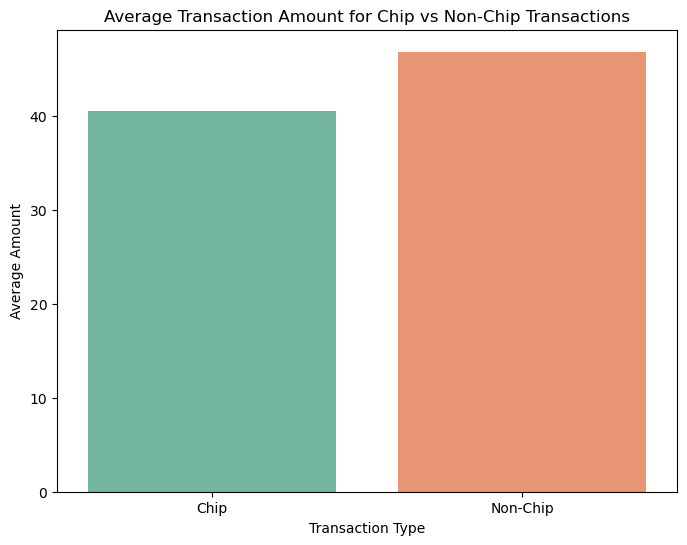

In [15]:
## Calculate the average transaction amount for Chip vs Non-Chip transactions
# Group the data by 'transaction_type' and calculate the mean transaction amount for each category
avg_transaction_amount = transaction_data.groupby('transaction_type')['amount'].mean().reset_index()  

# Create a bar plot to visualize the average transaction amount for Chip vs Non-Chip transactions
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
sns.barplot(x='transaction_type', y='amount', data=avg_transaction_amount, palette='Set2')  
# Use Seaborn's barplot to display the average amounts with multiple color palette
# Add a title and labels
plt.title('Average Transaction Amount for Chip vs Non-Chip Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Average Amount')

# Display the bar plot
plt.show()


In [16]:
## Identify the most frequent merchant category and its transaction count
most_frequent_category = transaction_data['merchant_category'].value_counts().idxmax()  
# Find the merchant category with the highest transaction count
most_frequent_count = transaction_data['merchant_category'].value_counts().max()  
# Get the number of transactions for the most frequent merchant category
print(f"Most frequent merchant category: {most_frequent_category} ({most_frequent_count} transactions)")


Most frequent merchant category: Grocery Stores, Supermarkets (137314 transactions)


Top 5 highest spending categories:
              merchant_category      amount
0                Money Transfer  4431800.00
1  Grocery Stores, Supermarkets  3478169.49
2               Wholesale Clubs  3134803.99
3    Drug Stores and Pharmacies  2958018.55
4              Service Stations  2464898.61


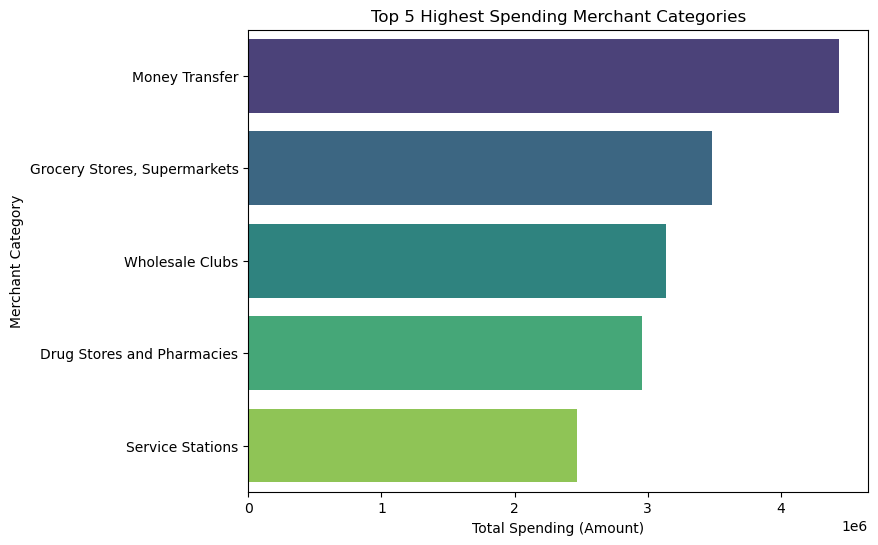

In [17]:
# Calculate total spending for each merchant category and sort in descending order
# Group by 'merchant_category', sum up the 'amount', and sort by total spending
spending_by_category = transaction_data.groupby('merchant_category')['amount'].sum().sort_values(ascending=False).reset_index()  

# Display the top 5 highest spending categories
print("Top 5 highest spending categories:")
print(spending_by_category.head())  # Show the top 5 categories with the highest spending

# Plot the top 5 highest spending merchant categories
plt.figure(figsize=(8, 6))  # Set the figure size for better visualization
sns.barplot(x='amount', y='merchant_category', data=spending_by_category.head(), palette='viridis')  
# Create a horizontal bar plot to visualize total spending for the top 5 categories
plt.title('Top 5 Highest Spending Merchant Categories')  # Add a title to the plot
plt.xlabel('Total Spending (Amount)')  # Label the x-axis
plt.ylabel('Merchant Category')  # Label the y-axis
plt.show()  # Display the plot


Number of unique merchants per category:
                              merchant_category  unique_merchants
45                 Grocery Stores, Supermarkets              2624
34                Eating Places and Restaurants              2212
33                   Drug Stores and Pharmacies              1500
8                      Automotive Service Shops              1238
104  Utilities - Electric, Gas, Water, Sanitary              1206


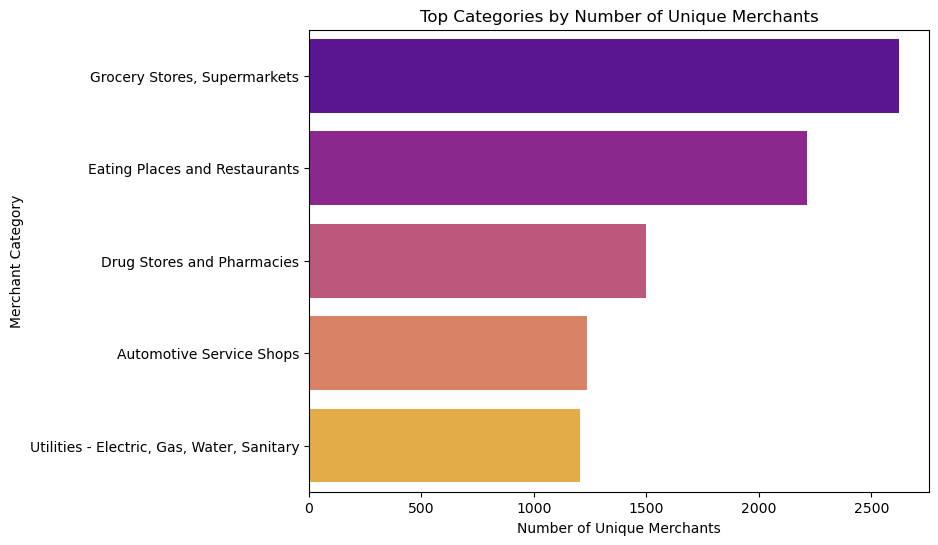

In [18]:
# Calculate the number of unique merchants for each category
# Group by 'merchant_category' and count unique 'merchant_id' for each category
unique_merchants_per_category = transaction_data.groupby('merchant_category')['merchant_id'].nunique().reset_index()  
# Rename the column to 'unique_merchants' for better clarity
unique_merchants_per_category = unique_merchants_per_category.rename(columns={'merchant_id': 'unique_merchants'})  


# Display the categories with the highest number of unique merchants
print("Number of unique merchants per category:")
# Sort by 'unique_merchants' in descending order and display the top categories
print(unique_merchants_per_category.sort_values(by='unique_merchants', ascending=False).head())  

# Plot the top categories by number of unique merchants
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
sns.barplot(x='unique_merchants', y='merchant_category', data=unique_merchants_per_category.sort_values(by='unique_merchants', ascending=False).head(), palette='plasma')  
# Create a horizontal bar plot for the top categories with the most unique merchants
plt.title('Top Categories by Number of Unique Merchants')  # Add a title to the plot
plt.xlabel('Number of Unique Merchants')  # Label the x-axis
plt.ylabel('Merchant Category')  # Label the y-axis
plt.show()  # Display the plot


In [19]:
## Identify transactions above the top 5% threshold
threshold = transaction_data['amount'].quantile(0.95)  # Calculate the 95th percentile to determine the top 5% threshold
high_value_transactions = transaction_data[transaction_data['amount'] > threshold]  # Filter transactions above the threshold

# Display the top 5% threshold value and the count of high-value transactions
print(f"Top 5% threshold for high-value transactions: {threshold:.2f}")
print(f"Number of high-value transactions: {high_value_transactions.shape[0]}")

# Print summary statistics for high-value transactions
print("Summary of High-Value Transactions:")
print(high_value_transactions['amount'].describe())  #  statistical summary of the 'amount' for high-value transactions

Top 5% threshold for high-value transactions: 144.95
Number of high-value transactions: 57061
Summary of High-Value Transactions:
count    57061.000000
mean       260.118168
std        184.061583
min        144.960000
25%        163.780000
50%        196.050000
75%        276.990000
max       6613.440000
Name: amount, dtype: float64


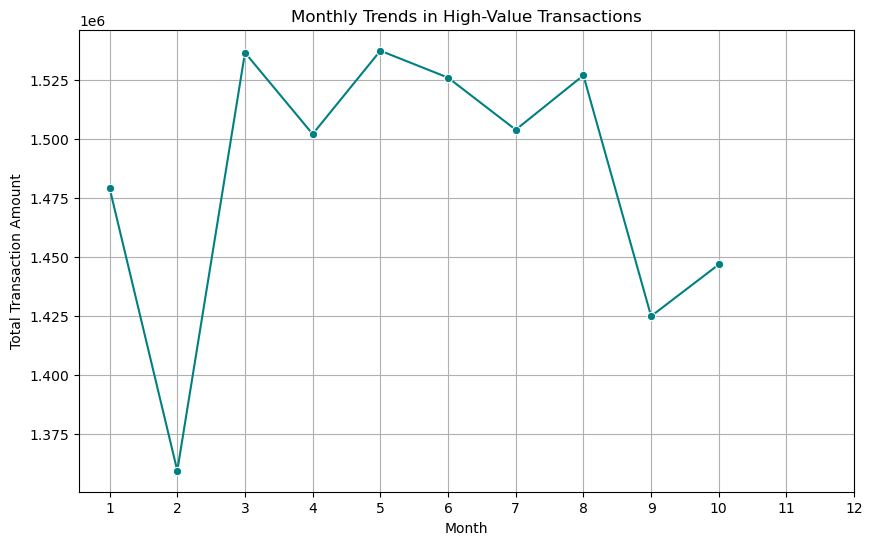

In [20]:
# Group the high-value transactions by month and calculate the total transaction amount for each month
monthly_trends = high_value_transactions.groupby('month')['amount'].sum().reset_index()  

# Create a line plot to visualize the monthly trends in high-value transactions
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
sns.lineplot(x='month', y='amount', data=monthly_trends, marker='o', color='teal')  # Plot the monthly trend with markers for each point
plt.title('Monthly Trends in High-Value Transactions')  # Add a title to the plot
plt.xlabel('Month')  # Label the x-axis with 'Month'
plt.ylabel('Total Transaction Amount')  # Label the y-axis with 'Total Transaction Amount'
plt.xticks(range(1, 13))  # Set the x-axis ticks to represent the 12 months
plt.grid()  # Add a grid to make the plot easier to read
plt.show()  # Display the plot

Average transaction amount per client_id:
   client_id  average_transaction_amount
0          0                   47.703649
1          1                   35.894229
2          2                   26.323139
3          3                   48.802877
4          4                   39.843083


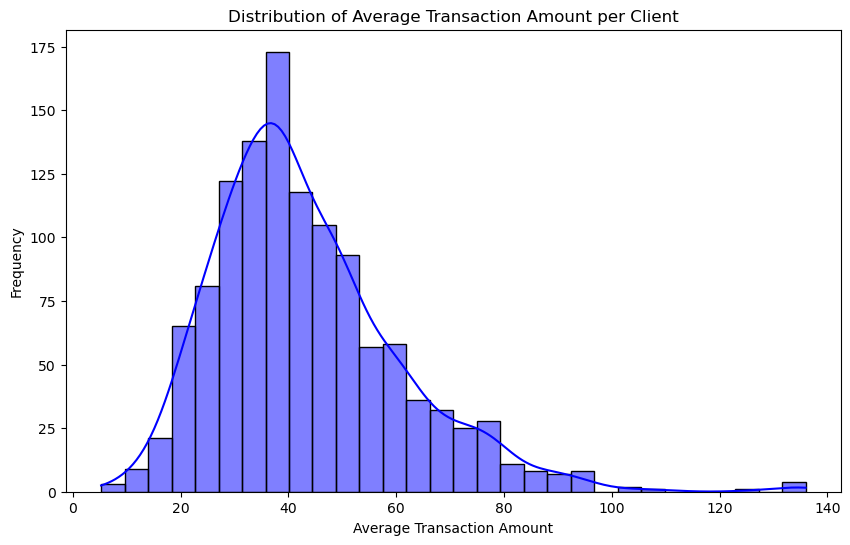

In [21]:
# Calculate the average transaction amount for each client_id
# Group by 'client_id' and calculate the mean of 'amount' for each client
average_transaction_per_client = transaction_data.groupby('client_id')['amount'].mean().reset_index()  

# Rename the column 'amount' to 'average_transaction_amount' for clarity
average_transaction_per_client = average_transaction_per_client.rename(columns={'amount': 'average_transaction_amount'})  


# Display the top records of average transaction amounts per client_id
print("Average transaction amount per client_id:")
print(average_transaction_per_client.head())

# Plot the distribution of average transaction amounts per client
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
sns.histplot(average_transaction_per_client['average_transaction_amount'], bins=30, kde=True, color='blue')  
# Create a histogram to visualize the distribution of average transaction amounts
plt.title('Distribution of Average Transaction Amount per Client')  # Add a title to the plot
plt.xlabel('Average Transaction Amount')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.show()  # Display the plot

Distribution of number of transactions per user:
   client_id  transaction_count
0       1098               4044
1       1963               3663
2       1776               3570
3        909               3539
4        114               3278


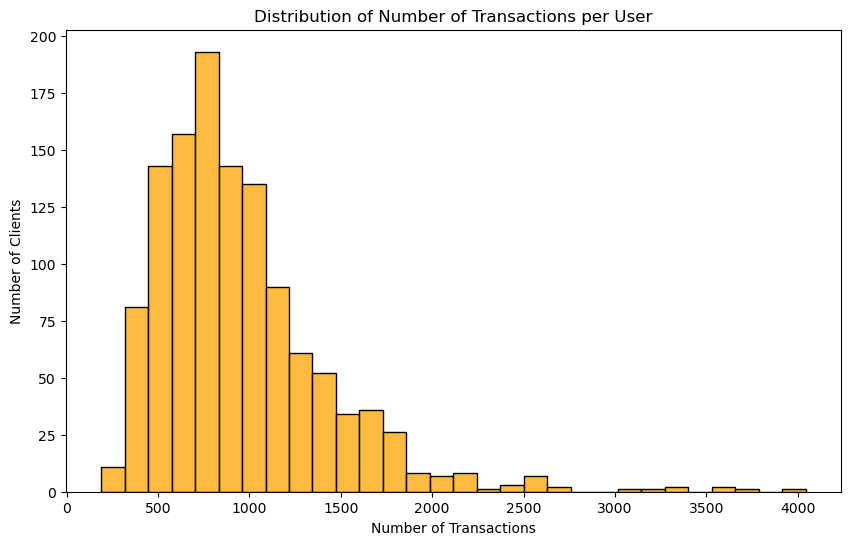

In [22]:
# Calculate the number of transactions for each client_id
# Use value_counts() to get the count of transactions per 'client_id
transaction_count_per_client = transaction_data['client_id'].value_counts().reset_index()  

# Rename columns ''count becomes 'transaction_count'
transaction_count_per_client = transaction_count_per_client.rename(columns={'count': 'transaction_count'})  

# Display the top records of transaction counts per client_id
print("Distribution of number of transactions per user:")
print(transaction_count_per_client.head())  # Print the first few rows of the DataFrame

# Plot the distribution of transaction counts per client
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
sns.histplot(transaction_count_per_client['transaction_count'], bins=30, kde=False, color='orange')  
# Create a histogram to visualize the distribution of transaction counts for users
plt.title('Distribution of Number of Transactions per User')  # Add a title to the plot
plt.xlabel('Number of Transactions')  # Label the x-axis
plt.ylabel('Number of Clients')  # Label the y-axis
plt.show()  # Display the plot
